In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
 medical_insurance = pd.read_csv('medical_insurance.csv')

In [3]:
medical_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
medical_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [5]:
medical_insurance.shape

(2772, 7)

In [6]:
medical_insurance.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


C:\anacondaaaa\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x600 with 0 Axes>

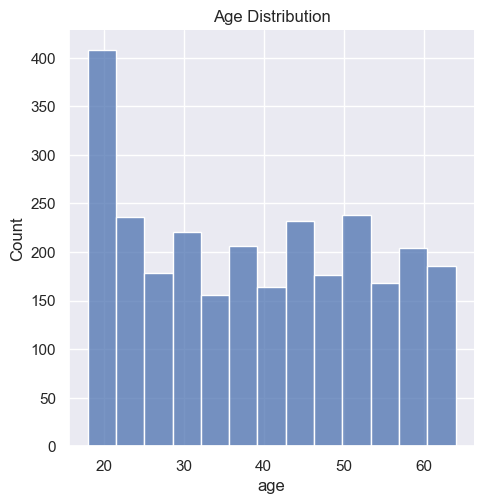

In [7]:
sns.set()
plt.figure(figsize=(6,6))
sns.displot(medical_insurance['age'])
plt.title('Age Distribution')
plt.show()


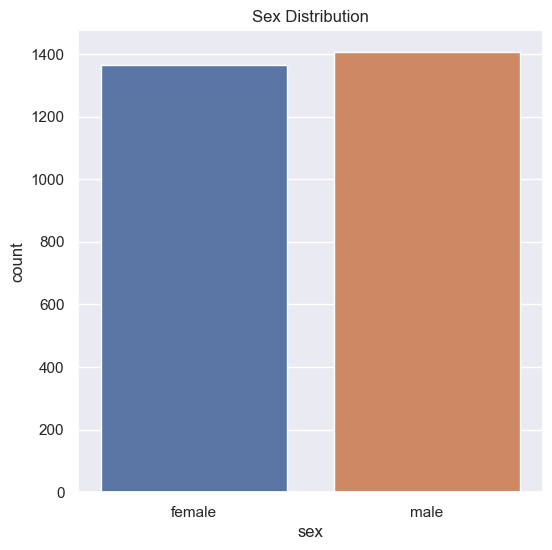

In [8]:
plt.figure(figsize=(6,6))
sns.countplot(x="sex", data=medical_insurance)
plt.title('Sex Distribution')
plt.show()
 

C:\anacondaaaa\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


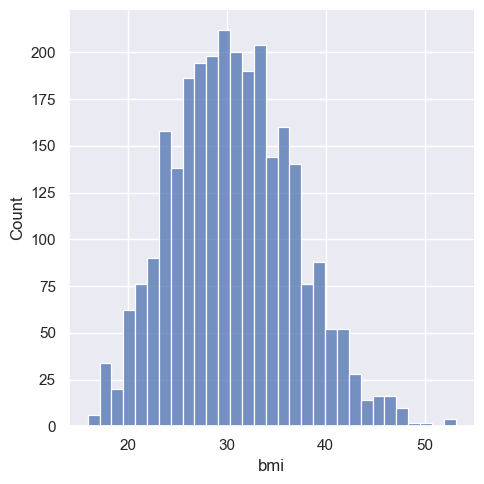

In [9]:
sns.displot(medical_insurance['bmi'])
plt.show()

In [10]:
medical_insurance['region'].value_counts()

region
southeast    766
southwest    684
northwest    664
northeast    658
Name: count, dtype: int64

In [11]:
medical_insurance.replace({'sex': {'male':1, 'female':0}}, inplace=True)

In [12]:
medical_insurance.replace({'region': {'southeast':1, 'southwest':0, 'northeast':2, 'northwest':3}}, inplace=True)

In [13]:
medical_insurance.replace({'smoker': {'yes': 1, 'no':0}}, inplace=True)

In [14]:
X = medical_insurance.drop(columns="charges", axis=1)
Y = medical_insurance["charges"]

In [15]:
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,0
1,18,1,33.770,1,0,1
2,28,1,33.000,3,0,1
3,33,1,22.705,0,0,3
4,32,1,28.880,0,0,3
...,...,...,...,...,...,...
2767,47,0,45.320,1,0,1
2768,21,0,34.600,0,0,0
2769,19,1,26.030,1,1,3
2770,23,1,18.715,0,0,3


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_test, X_train, Y_test, Y_train = train_test_split(X,Y, test_size=0.2, random_state=42)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
X_train

,age,sex,bmi,children,smoker,region
1106,49,0,29.925,0,0,3
1321,62,1,26.695,0,1,2
2313,57,0,20.100,1,0,0
2274,22,1,39.500,0,0,0
1432,18,0,38.665,2,0,2
...,...,...,...,...,...,...
930,26,1,46.530,1,0,1
2610,41,1,23.940,1,0,2
1700,27,0,31.400,0,1,0
100,41,0,31.600,0,0,0


In [20]:
LR = LinearRegression()

In [21]:
LR.fit(X_train, Y_train)

LinearRegression()

In [22]:
training_data_pred = LR.predict(X_train)

In [26]:
from sklearn.metrics import accuracy_score, r2_score

In [28]:
r2_score(Y_train,training_data_pred)


0.7424402792089503

In [29]:
test_data_prediction = LR.predict(X_test)

In [30]:
r2_score(Y_test, test_data_prediction)

0.7498727535251586

In [42]:
sample_data = (30, 1, 22.7, 0, 1, 0)

In [43]:
input_numpy_array = np.asarray(sample_data)
input_data_reshaped = input_numpy_array.reshape(1, -1)

In [44]:
prediction = LR.predict(input_data_reshaped)

C:\anacondaaaa\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [45]:
prediction

array([26749.78788151])